In [74]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

# LAB 6 - Model comparison

### Parameters

In [75]:
F = len("Jakub")
L = len("Grzesiak")
N = (F + L) * 100

seed = 20000128 #RRRRMMDD

### Excercise 1 - generate data

In [76]:
model1 = CmdStanModel(stan_file='code_1.stan')
sample1 = model1.sample(data = {'N': N},
                        iter_sampling=1,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1, 
                        seed=seed)

df1 = sample1.draws_pd()
y1 = df1.loc[0,'y[1]':f"y[{N}]"].values

df1

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,0.65622,-0.935877,0.714458,-0.130442,0.718683,1.25562,-0.015641,...,0.708541,-0.345342,0.10149,0.619077,-0.794589,-0.486068,0.538104,0.654297,-2.09819,0.091029


In [77]:
model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(data = {'N': N},
                        iter_sampling=1,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1, 
                        seed=seed)

df2 = sample2.draws_pd()
y2 = df2.loc[0,'y[1]':f"y[{N}]"].values

df2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.65622,1.13592,1.83695,-0.159003,-0.832187,2.33834,-0.015641,-0.279185,...,-1.13008,-1.44835,0.223076,-3.22857,3.60864,-0.722246,-0.980642,-0.191526,0.24298,2.95032


### Excercise 2 - compare normal and student models for data from first file

In [78]:
model3 = CmdStanModel(stan_file='code_3.stan')
sample3 = model3.sample(data = {'N': N, 'y': y1},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1, 
                        seed=seed)

df3 = sample3.draws_pd()
df3.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,0.0,0.0,6.28546,0.157919,-2.76032,-2.77232,-2.7611,-2.75823,-2.76116,-2.77243,...,-1.231380,0.986035,2.516950,-13.731500,5.42528,-3.57679,6.42389,3.36361,1.023860,1.43614
1,0.0,0.0,6.28546,0.157919,-2.76032,-2.77232,-2.7611,-2.75823,-2.76116,-2.77243,...,-0.252000,-2.116390,-4.028980,3.895020,8.68296,-4.78006,-17.49730,5.84564,-1.297130,4.23414
2,0.0,0.0,6.28546,0.157919,-2.76032,-2.77232,-2.7611,-2.75823,-2.76116,-2.77243,...,-7.092060,-9.622380,-1.380750,0.318908,1.60471,-4.03734,-3.69827,-9.38379,-1.014730,-2.96115
3,0.0,0.0,6.28546,0.157919,-2.76032,-2.77232,-2.7611,-2.75823,-2.76116,-2.77243,...,-0.131671,-3.437370,1.798240,3.826050,3.05670,10.12330,1.04549,-8.37416,1.994650,13.62890
4,0.0,0.0,6.28546,0.157919,-2.76032,-2.77232,-2.7611,-2.75823,-2.76116,-2.77243,...,-0.248495,0.677297,-0.062336,2.315590,-2.67499,-15.81510,-9.41119,-12.66870,0.212512,2.31130


In [79]:
df3.describe()

,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
count,1000.0,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,-0.245063,0.277032,0.371135,0.081466,0.211989,0.051210,0.067418,0.000268,-0.147414,0.357978
std,0.0,0.0,8.886228e-16,2.776946e-17,4.443114e-16,0.00000,4.443114e-16,4.443114e-16,8.886228e-16,4.443114e-16,...,6.335621,6.336742,6.396503,6.358447,6.411327,6.336403,6.497358,6.075038,6.203213,6.374004
min,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,-21.378200,-29.870400,-22.412600,-19.280600,-21.142000,-21.095600,-19.472000,-19.086900,-17.996900,-21.917000
25%,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,-4.374008,-3.982640,-3.966673,-4.160060,-3.821662,-4.345830,-4.258768,-3.964455,-4.464927,-3.950505
50%,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,-0.132609,0.421963,0.497239,0.139456,0.466351,-0.109019,0.322294,-0.007025,-0.279060,0.332719
75%,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,4.078642,4.476500,4.426230,4.263415,4.305145,4.537200,4.355560,4.035930,3.940285,4.752005
max,0.0,0.0,6.285460e+00,1.579190e-01,-2.760320e+00,-2.77232,-2.761100e+00,-2.758230e+00,-2.761160e+00,-2.772430e+00,...,22.538400,21.573800,20.642400,25.033500,22.747100,17.699600,19.706200,18.715100,17.367800,21.175700


In [80]:
model4 = CmdStanModel(stan_file='code_4.stan')
sample4 = model4.sample(data = {'N': N, 'y': y1},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1, 
                        seed=seed)

df4 = sample4.draws_pd()
df4.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,0.0,0.0,6.28546,0.157919,0.489065,-3.16462,-3.19985,-3.16696,-3.15831,-3.16713,...,-1.19974,1.84427,-3.75076,-97.42850,-7.050840e+00,-212.06200,5.61108,-10583.50000,0.064951,1.25003
1,0.0,0.0,6.28546,0.157919,0.489065,-3.16462,-3.19985,-3.16696,-3.15831,-3.16713,...,-45.23080,-5.27165,37.48330,2.81676,9.796830e+01,20.34850,14.96490,10.21020,-2.822360,-133.51800
2,0.0,0.0,6.28546,0.157919,0.489065,-3.16462,-3.19985,-3.16696,-3.15831,-3.16713,...,31.73180,-6.48477,-37.17760,12.92280,-6.865660e+08,5.88304,-8.06310,8.37173,361.360000,-5.05852
3,0.0,0.0,6.28546,0.157919,0.489065,-3.16462,-3.19985,-3.16696,-3.15831,-3.16713,...,25.74900,-10.71140,-518.12600,-4.89067,2.518650e+03,2.76278,-6.22976,3.96241,-18.242100,96.54040
4,0.0,0.0,6.28546,0.157919,0.489065,-3.16462,-3.19985,-3.16696,-3.15831,-3.16713,...,-6.87779,-1.98146,7.52220,6.47553,-4.851120e+00,-1.80924,7.44533,16.12520,9.785900,14.53170


In [81]:
df4.describe()

,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
count,1000.0,1000.0,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,-8.214536e+03,-3.092329e+04,-3.336158e+04,-2.693511e+04,-6.861617e+05,-3.860763e+03,-290.028519,4.444595e+05,6.766480e+06,-1.840485e+03
std,0.0,0.0,8.886228e-16,2.776946e-17,0.000000,4.443114e-16,4.443114e-16,8.886228e-16,4.443114e-16,0.00000,...,1.719097e+05,1.408633e+06,1.135274e+06,6.446404e+05,2.171115e+07,4.482951e+05,23115.899329,1.421052e+07,2.138641e+08,7.048026e+04
min,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,-5.131590e+06,-4.054100e+07,-3.274950e+07,-1.512860e+07,-6.865660e+08,-1.306600e+07,-640641.000000,-4.421300e+06,-3.578190e+05,-2.202180e+06
25%,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,-8.800408e+00,-1.161257e+01,-1.251237e+01,-8.333518e+00,-8.592173e+00,-9.401273e+00,-9.598558,-8.824858e+00,-1.113300e+01,-9.914225e+00
50%,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,2.430215e-01,-3.834570e-01,-2.732065e-01,2.467610e-01,3.209540e-01,3.088410e-01,-0.099521,3.576485e-01,-7.825695e-01,6.311255e-01
75%,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,1.108608e+01,9.518835e+00,9.256600e+00,1.144355e+01,1.045290e+01,1.061800e+01,9.766055,1.046410e+01,9.048225e+00,1.176525e+01
max,0.0,0.0,6.285460e+00,1.579190e-01,0.489065,-3.164620e+00,-3.199850e+00,-3.166960e+00,-3.158310e+00,-3.16713,...,2.471100e+05,1.595480e+07,1.085820e+07,1.059480e+06,4.589180e+05,4.886130e+06,268531.000000,4.493490e+08,6.762980e+09,2.075350e+05


In [82]:
fit_normal = az.from_cmdstanpy(posterior=sample3)
fit_chi = az.from_cmdstanpy(posterior=sample4)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


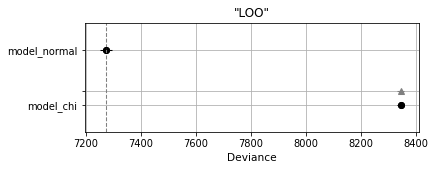

In [83]:
loo = az.compare({'model_normal': fit_normal, 'model_chi': fit_chi}, ic='loo', scale='deviance')
az.plot_compare(loo)
plt.title('"LOO"')
plt.grid(True)
plt.show()

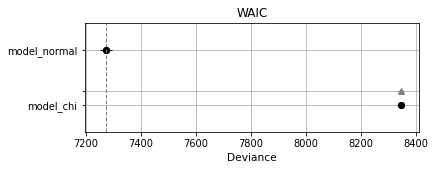

In [84]:
waic = az.compare({'model_normal': fit_normal, 'model_chi': fit_chi}, ic='waic', scale='deviance')
az.plot_compare(waic)
plt.title('WAIC')
plt.grid(True)
plt.show()

### Excercise 3 - compare models with diferent numbers of predictors

In [85]:
model5 = CmdStanModel(stan_file='code_5.stan')

predictors_number = [1, 2, 3]
samples_list = list()

for K in predictors_number:

    X = df2.loc[:, 'X[1,1]':f'X[{N},{K}]'].values.reshape((N, K))

    sample5 = model5.sample(data = {'N': N, 'K': K, 'y': y2, 'X': X},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1, 
                        seed=seed)
    
    samples_list.append(sample5)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [86]:
compare_dict = dict()

for i in range(len(predictors_number)):
    
    compare_dict[f'model with "{predictors_number[i]}" predictor/s'] = samples_list[i]


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

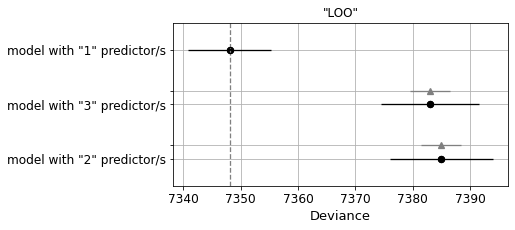

In [87]:
loo = az.compare(compare_dict, ic='loo', scale='deviance')
az.plot_compare(loo)
plt.title('"LOO"')
plt.grid(True)
plt.show()

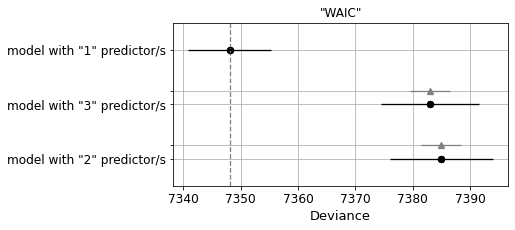

In [88]:
waic = az.compare(compare_dict, ic='waic', scale='deviance')
az.plot_compare(loo)
plt.title('"WAIC"')
plt.grid(True)
plt.show()